In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#Time Series model is always Regression Model

In [8]:
df = pd.read_csv("monthly_milk_production.csv",index_col="Date",parse_dates=True)

In [ ]:
df.info()

In [9]:
df.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


In [10]:
df.tail()

,Production
Date,
1975-08-01,858
1975-09-01,817
1975-10-01,827
1975-11-01,797
1975-12-01,843


In [11]:
df["1962":"1963"]

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727
1962-06-01,697
1962-07-01,640
1962-08-01,599
1962-09-01,568


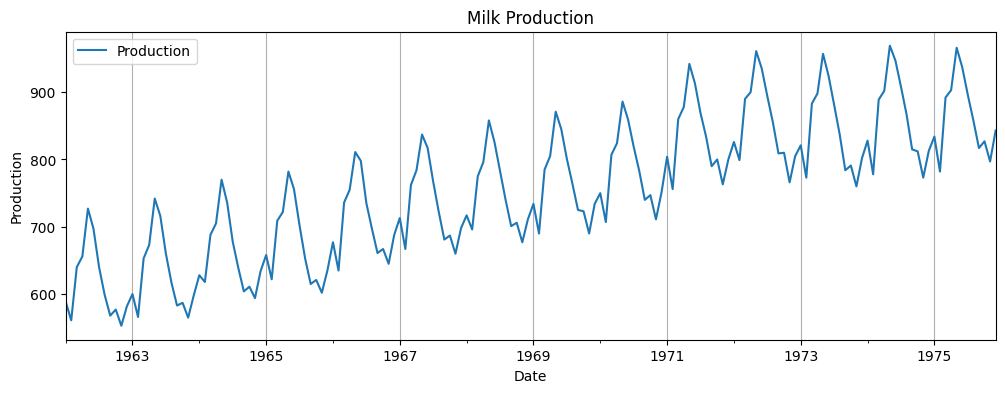

In [16]:
df.plot(figsize=(12,4),xlabel="Date",ylabel="Production",title="Milk Production")
plt.grid(axis="x")
plt.show()

#### This is sequential data as it depends on past data ,in this data we can see each year is depending on last year.
#### This has seasonal pattern also.

In [17]:
pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/9.8 MB 1.7 MB/s eta 0:00:06
    --------------------------------------- 0.1/9.8 MB 1.4 MB/s eta 0:00:07
    --------------------------------------- 0.2/9.8 MB 1.7 MB/s eta 0:00:06
    --------------------------------------- 0.2/9.8 MB 1.2 MB/s eta 0:00:09
   - -------------------------------------- 0.3/9.8 MB 1.1 MB/s eta 0:00:09
   - -------------------------------------- 0.3/9.8 MB 1.2 MB/s eta 0:00:08
   - -------------------------------------- 0.5/9.8 MB 1.5 MB/s eta 0:00:07
   -- ------------------------------------- 0.6/9.8 MB 1.5 MB/s eta 0:00:07
   -- ------------------------------------- 0.6/9.8 MB 1.5 MB/s eta 0:00:07
   -- ------------------------------------- 0.6/9.8 MB 1.4 MB/s eta 0:00:07
   -- ------------------------------------- 0.7/9.8 MB 1.4 MB/s eta 0:00:07
   -- ------------------------------------- 0.7/9.8 MB 1.4 MB/s eta 0:00:07
   --- ------------

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
# seasonal_decompose is used for date wise data.

In [19]:
result = seasonal_decompose(df["Production"])

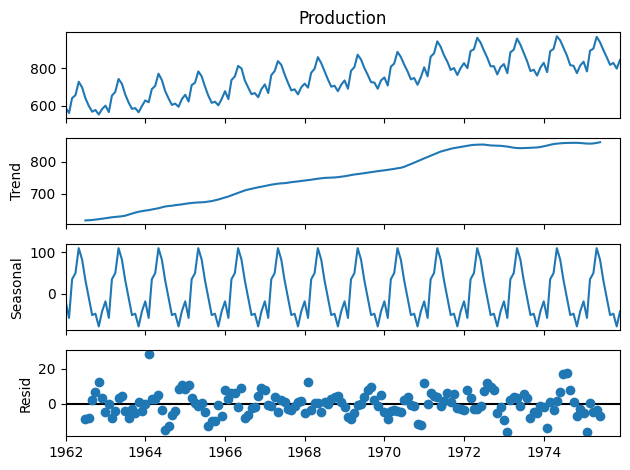

In [22]:
result.plot();
#Trend is yearwise.
#1st graph(actual data) is the average of year.
#Seasonal is fixed pattern.
#Resid is residual(data which is out of the trend data).

In [23]:
len(df)

168

In [24]:
len(df)/12

14.0

In [25]:
#Previous data --> Training (Last 12 months)
train = df.iloc[:len(df)-12]
train.shape

(156, 1)

In [26]:
#Future data --> Testing (Remaining data of train)
test = df.iloc[len(df)-12:]
test.shape

(12, 1)

In [28]:
train.iloc[0],train.iloc[-1]

(Production    589
 Name: 1962-01-01 00:00:00, dtype: int64,
 Production    813
 Name: 1974-12-01 00:00:00, dtype: int64)

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
scaler = MinMaxScaler()

In [31]:
scaler.fit(train)

MinMaxScaler()

In [32]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [33]:
scaled_train[:10]

array([[0.08653846],
       [0.01923077],
       [0.20913462],
       [0.24759615],
       [0.41826923],
       [0.34615385],
       [0.20913462],
       [0.11057692],
       [0.03605769],
       [0.05769231]])

In [34]:
scaled_train[146:]

array([[0.80769231],
       [0.83894231],
       [1.        ],
       [0.94711538],
       [0.85336538],
       [0.75480769],
       [0.62980769],
       [0.62259615],
       [0.52884615],
       [0.625     ]])

In [35]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [36]:
months = 12

In [37]:
generator = TimeseriesGenerator(scaled_train, scaled_train, length=months, batch_size=1)
# If 3 input then 4 will be output same goes with 12 months & will increase by 1 month.
# We can see X,y is started with [0.08653846], X1,y1 is starting with [0.01923077], X2,y2 is starting with [0.20913462].This is how it will increase by 1 month .

In [38]:
X,y = generator[0]

In [39]:
X,y

(array([[[0.08653846],
         [0.01923077],
         [0.20913462],
         [0.24759615],
         [0.41826923],
         [0.34615385],
         [0.20913462],
         [0.11057692],
         [0.03605769],
         [0.05769231],
         [0.        ],
         [0.06971154]]]),
 array([[0.11298077]]))

In [40]:
X1, y1 = generator[1]

In [41]:
X1, y1

(array([[[0.01923077],
         [0.20913462],
         [0.24759615],
         [0.41826923],
         [0.34615385],
         [0.20913462],
         [0.11057692],
         [0.03605769],
         [0.05769231],
         [0.        ],
         [0.06971154],
         [0.11298077]]]),
 array([[0.03125]]))

In [42]:
X2, y2 = generator[2]

In [43]:
X2,y2

(array([[[0.20913462],
         [0.24759615],
         [0.41826923],
         [0.34615385],
         [0.20913462],
         [0.11057692],
         [0.03605769],
         [0.05769231],
         [0.        ],
         [0.06971154],
         [0.11298077],
         [0.03125   ]]]),
 array([[0.24038462]]))

In [44]:
generator[0][0].shape

(1, 12, 1)

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

In [47]:
model = Sequential([
    LSTM(1000, activation="relu", input_shape=(12,1)),
    Dense(1)
])

C:\Users\Kritika\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [49]:
model.compile(optimizer="adam", loss="mse")
# mse = Mean Square Error

In [50]:
model.fit(generator,epochs=40)

Epoch 1/40
  2/144 ━━━━━━━━━━━━━━━━━━━━ 11s 82ms/step - loss: 0.2545

C:\Users\Kritika\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


144/144 ━━━━━━━━━━━━━━━━━━━━ 13s 82ms/step - loss: 0.0530
Epoch 2/40
144/144 ━━━━━━━━━━━━━━━━━━━━ 12s 83ms/step - loss: 0.0289
Epoch 3/40
144/144 ━━━━━━━━━━━━━━━━━━━━ 12s 83ms/step - loss: 0.0106
Epoch 4/40
144/144 ━━━━━━━━━━━━━━━━━━━━ 12s 82ms/step - loss: 0.0041
Epoch 5/40
144/144 ━━━━━━━━━━━━━━━━━━━━ 12s 82ms/step - loss: 0.0077
Epoch 6/40
144/144 ━━━━━━━━━━━━━━━━━━━━ 12s 82ms/step - loss: 0.0045
Epoch 7/40
144/144 ━━━━━━━━━━━━━━━━━━━━ 12s 83ms/step - loss: 0.0034
Epoch 8/40
144/144 ━━━━━━━━━━━━━━━━━━━━ 12s 83ms/step - loss: 0.0022
Epoch 9/40
144/144 ━━━━━━━━━━━━━━━━━━━━ 12s 83ms/step - loss: 0.0046
Epoch 10/40
144/144 ━━━━━━━━━━━━━━━━━━━━ 12s 83ms/step - loss: 0.0027
Epoch 11/40
144/144 ━━━━━━━━━━━━━━━━━━━━ 12s 85ms/step - loss: 0.0021
Epoch 12/40
144/144 ━━━━━━━━━━━━━━━━━━━━ 12s 84ms/step - loss: 0.0018
Epoch 13/40
144/144 ━━━━━━━━━━━━━━━━━━━━ 12s 85ms/step - loss: 0.0029
Epoch 14/40
144/144 ━━━━━━━━━━━━━━━━━━━━ 13s 87ms/step - loss: 0.0017
Epoch 15/40
144/144 ━━━━━━━━━━━━━━━━━━━━

In [51]:
loss = model.history.history["loss"]

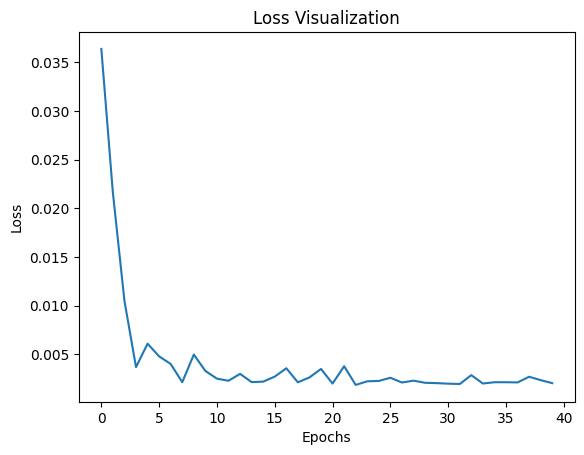

In [53]:
plt.plot(loss)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Visualization")
plt.show()

In [74]:
test_pred = []

first_eval_batch = scaled_train[-12:]
current_batch = first_eval_batch.reshape((1,12,1))

In [75]:
for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_pred.append(current_pred)
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [76]:
test_pred
#The value is in 0.... beacuse we did MINMAXScaler

[array([0.68711436], dtype=float32),
 array([0.5990781], dtype=float32),
 array([0.80843896], dtype=float32),
 array([0.85670745], dtype=float32),
 array([1.0036168], dtype=float32),
 array([0.96562004], dtype=float32),
 array([0.87712544], dtype=float32),
 array([0.7888677], dtype=float32),
 array([0.67745125], dtype=float32),
 array([0.6585009], dtype=float32),
 array([0.5806377], dtype=float32),
 array([0.65417653], dtype=float32)]

In [77]:
test.head()

,Production
Date,
1975-01-01,834
1975-02-01,782
1975-03-01,892
1975-04-01,903
1975-05-01,966


In [78]:
true_pred = scaler.inverse_transform(test_pred)
# Here we have reversed the 0... to the original value

In [79]:
true_pred

array([[838.83957291],
       [802.21649742],
       [889.310606  ],
       [909.39030075],
       [970.5045929 ],
       [954.69793701],
       [917.88418388],
       [881.1689682 ],
       [834.81972122],
       [826.93637848],
       [794.54528046],
       [825.13743782]])

In [80]:
test["Predictions"]= true_pred

C:\Users\Kritika\AppData\Local\Temp\ipykernel_22772\3104063954.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Predictions"]= true_pred


In [81]:
test.head()

,Production,Predictions
Date,,
1975-01-01,834,838.839573
1975-02-01,782,802.216497
1975-03-01,892,889.310606
1975-04-01,903,909.390301
1975-05-01,966,970.504593


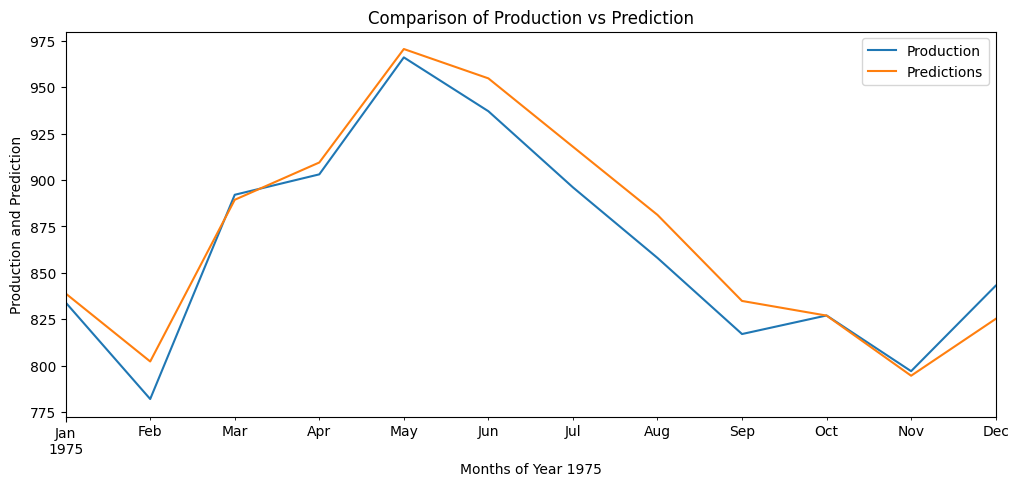

In [82]:
test.plot(figsize=(12,5))
plt.xlabel("Months of Year 1975")
plt.ylabel("Production and Prediction")
plt.title("Comparison of Production vs Prediction")
plt.show()

In [83]:
from sklearn.metrics import mean_squared_error

In [84]:
#rmse = root mean squared error
rmse = np.sqrt(mean_squared_error(test["Production"],test["Predictions"]))

In [85]:
rmse
#This is very low value.

14.35289526193986

In [86]:
test["Production"].mean()

862.6666666666666

In [87]:
test["Predictions"].mean()

870.4542897542318

In [88]:
min = 862.66 - rmse
max = 870.45 + rmse

In [89]:
min,max

(848.3071047380602, 884.8028952619399)

#### We can see 14.35 is far from 848.30 and 884.80.